<a href="https://colab.research.google.com/github/mandimarquardt/DataMining/blob/main/crate_and_barrel/crate_and_barrel_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crate and Barrel Project

This notebook will explore a Crate and Barrel product dataset supplied by Kaggle for a competition. The dataset contains features for the product and the class to which the product belongs. The notebook will explore the dataset and then build models to predict product classes.

Contents:

1.   Import Necessary Libraries
2.   Import the Data
3.   Data Analysis
4.   Data Visualization
5.   Cleaning Data
6.   Base Model
7.   Dense Neural Network (DNN)
8.   Conclusion
9.   Kaggle Submission



## 1) Import Necessary Libraries

### Runtime

Before we import libraries, let's ensure the runtime for this notebook is set to GPU. Without the GPU runtime, the Dense Neural Network (DNN) will not run.

If the following command produces a failure, do not proceed until the runtime has been set to GPU.

In [66]:
# Prove this notebook has GPU has the runtime type. If this fails, DNN will not work.
!nvidia-smi

Wed Nov 23 22:10:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    29W /  70W |   1004MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Import Libraries

This project will utilize various data anaylsis and machine learning Python libraries.



In [67]:
# Data analysis libraries
import pandas as pd
import numpy as np

# Visualizing data
import seaborn as sns

# Machine learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from keras import models, layers, optimizers
from keras.utils import to_categorical

## 2) Import the Data


### Upload Data

Upload `train.csv`, `test.csv`, and `sampleSubmission.csv` to the local drive. These csv file can be found by downloading them from Kaggle: https://www.kaggle.com/c/otto-group-product-classification-challenge/data?select=train.csv.

Note, the csv files can only be downloaded after registration.

In [68]:
# Show train.csv, test.csv, and sampleSubmission.csv exists locally
!ls

sample_data  sampleSubmission.csv  submit.csv  test.csv  train.csv


### Pandas

[Pandas](https://pandas.pydata.org/docs/reference/index.html) provides an easy way to read the contents of a csv file and instantiate an object, in this case a [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), that allows for easy manipulation of data. Plus, the machine learning libraries used in this notebook expect the data to be in a 2d array, which is how the contents are store in the DataFrame.

In [69]:
# Instantiate train dataframe
train = pd.read_csv('train.csv')
train

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9


In [70]:
# Instantiate test dataframe
test = pd.read_csv('test.csv')
test

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144363,144364,0,0,0,0,0,0,0,0,0,...,0,0,2,1,1,0,0,0,0,0
144364,144365,0,0,0,0,0,0,0,0,0,...,0,1,4,1,11,0,0,0,0,0
144365,144366,0,1,0,0,0,0,1,1,0,...,0,1,3,1,1,0,0,1,0,0
144366,144367,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,1,0


Something to note about the `test.csv` dataset is that it does not include the `target` feature column.

This is peeking a bit ahead, but the `target` feature is the `label` the machine learning models will try to predict. Also, given this project comes from a competition from Kaggle, it makes sense the `test.csv` does not have the labels. The competition (and a requirement of this project) requires the `sampleSubmission.csv` to be overridden with the predictions from a model, where the accuracy will be compared against other submissions.

## 3) Data Analysis



### Possible Features

Before picking a model, the dataset's features need to be explored because the data should determine the type of learning, such as supervised vs. unsupervised.

In [71]:
# Print the possible features
print(train.columns)

Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81', 'feat_82', 'fe

The dataset should have the following:
```
'id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30', 'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42', 'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54', 'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66', 'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79', 'feat_80', 'feat_81', 'feat_82', 'feat_83', 'feat_84',
'feat_85', 'feat_86', 'feat_87', 'feat_88', 'feat_89', 'feat_90', 'feat_91', 'feat_92', 'feat_93', 'target'
```

According to the Kaggle competition,

* The `id` is an anonymous id unique to a product.

* The feature fields `feat_1, feat_2, ..., feat_93` are the various features of the product. These are the features the DNN will use to learn.

* The `target` is the class of the product. This will be the value the DNN predicts.

#### Taking a Look at the Data

The dataset contains mostly `ints`. The only feature that's not an `int` is `target`, which is a `string`.

The dataset is also complete, i.e. there are no `null` or equivalent value in the dataset. This is true becuase the count for each feature and label below is the same (61878). Had there been missing data, the values would need to be replaced with `np.NaN`, which could have been done during the DataFrame instantiation or during the Cleaning Data step.




In [72]:
# Take a look at the training data
train.describe(include="all")

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Class_2
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16122
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135,NaN
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720,NaN
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


#### Some Observations:

* The `max` value for the features shown above range quite a bit. Therefore, they should be normalized.
* The min, 25, and 50 percent values are all zeroes. Given the table is truncated (i.e. not displaying the middle feature columns), that observation may not be fully accurate.
* Some features have `1` at 75 percent, which could mean that those features are a bit more common in the dataset.
* The top target value is `Class_2`. Its `freq` is 16122, which is just over a fourth of the total instances; (16122 / 61878) * 100 = 26.1
* There are only 9 target classes, see the `unique` row and `target` column.


#### Some Predictions:

* Given the training dataset is less than half of the test dataset (61878 / 144368 = 0.4286), the DNN will not achieve a high accuracy. I suspect this is the case because a majority of the feature values are `0`. So the DNN model will likely overfit because it trained on a small set of features.
* The features with a mean greater than 1 will have more of an influence on learning than the others.

## 4) Data Visualization

### Before Visualizing

* There are 93 features in this dataset. So, the visualizations will focus on a subset of the data.

* The graphs below are bar charts, and some bars have a thin black line. According to the [documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html), that line represents the 95% confidence interval. No line, means `seaborn` is 95% or more confident the value is correct. On the other hand, the presence of the line shows the range of values until `seaborn`'s 95% confident or more.

### Features with Means >= 1

Let's take a look at the features who's mean is greater than or equal 1. These should provide interesting graphs because they appear more within the dataset than the other features (see the `Data Analysis` section for evidence of `0` frequency within the dataset).

In [73]:
train_feats_mean_greater_than_or_equal_to_1 = train.drop('target', axis=1)
train_feats_mean_greater_than_or_equal_to_1 = train_feats_mean_greater_than_or_equal_to_1.drop('id', axis=1)
train_feats_mean_greater_than_or_equal_to_1 = train_feats_mean_greater_than_or_equal_to_1[train_feats_mean_greater_than_or_equal_to_1.columns[train_feats_mean_greater_than_or_equal_to_1.mean(axis=0) >= 1.0]]
print('Number of features with means greater than or equal to 1')
print(len(train_feats_mean_greater_than_or_equal_to_1.columns))

print(train_feats_mean_greater_than_or_equal_to_1.columns)

Number of features with means greater than or equal to 1
16
Index(['feat_9', 'feat_11', 'feat_14', 'feat_15', 'feat_16', 'feat_24',
       'feat_25', 'feat_32', 'feat_40', 'feat_48', 'feat_54', 'feat_60',
       'feat_62', 'feat_64', 'feat_67', 'feat_86'],
      dtype='object')


### `feat_9` feature

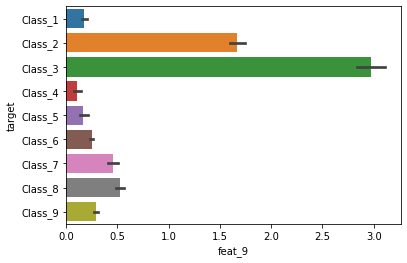

In [74]:
sns.barplot(x='feat_9', y='target', data=train)

### `feat_11` feature


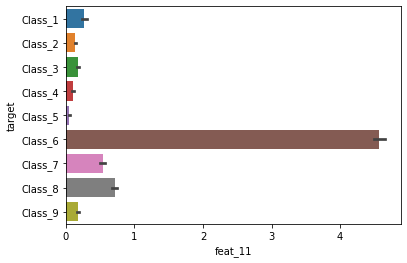

In [75]:
sns.barplot(x='feat_11', y='target', data=train)

### `feat_14` feature


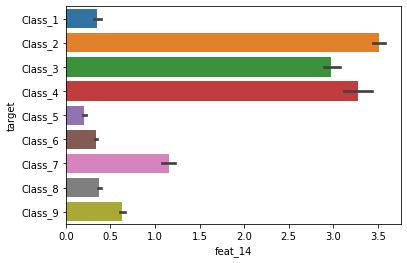

In [76]:
sns.barplot(x='feat_14', y='target', data=train)

### `feat_15` feature


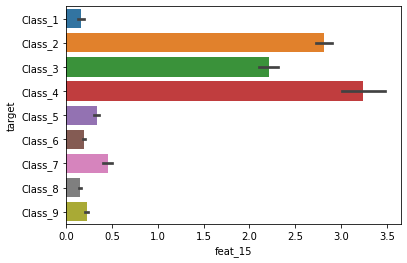

In [77]:
sns.barplot(x='feat_15', y='target', data=train)

### `feat_16` feature


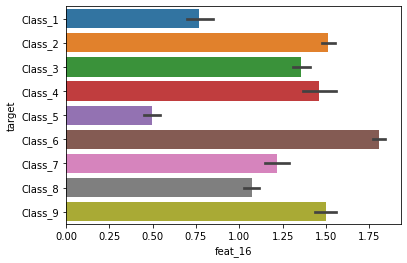

In [78]:
sns.barplot(x='feat_16', y='target', data=train)

### `feat_24` feature


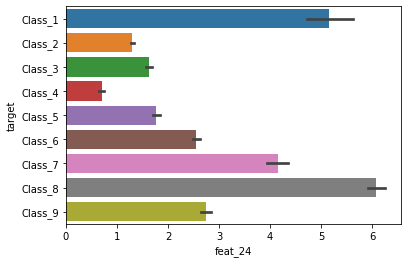

In [79]:
sns.barplot(x='feat_24', y='target', data=train)

### `feat_25` feature


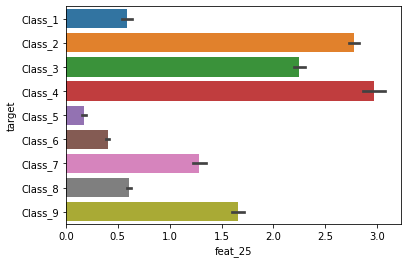

In [80]:
sns.barplot(x='feat_25', y='target', data=train)

### `feat_32` feature


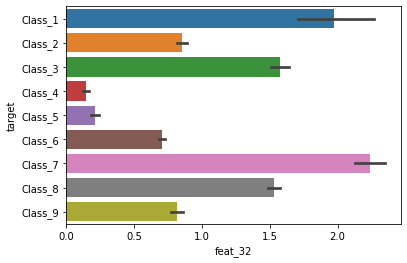

In [81]:
sns.barplot(x='feat_32', y='target', data=train)

### `feat_40` feature


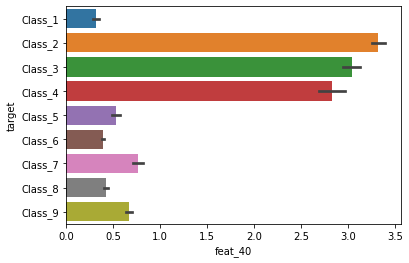

In [82]:
sns.barplot(x='feat_40', y='target', data=train)

### `feat_48` feature


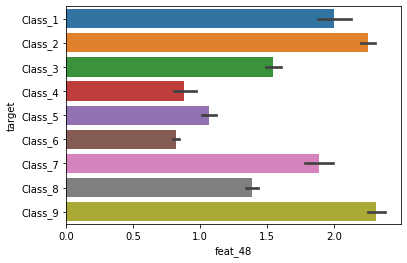

In [83]:
sns.barplot(x='feat_48', y='target', data=train)

### `feat_54` feature


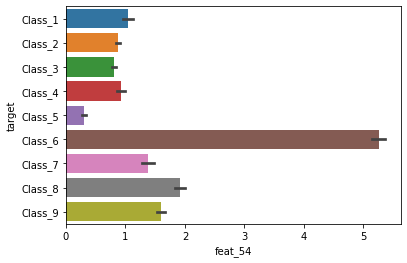

In [84]:
sns.barplot(x='feat_54', y='target', data=train)

### `feat_60` feature


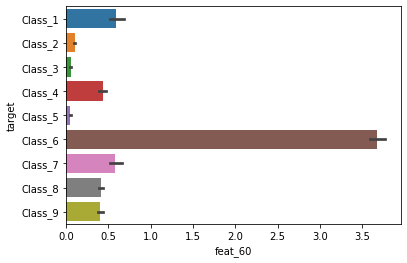

In [85]:
sns.barplot(x='feat_60', y='target', data=train)

### `feat_62` feature


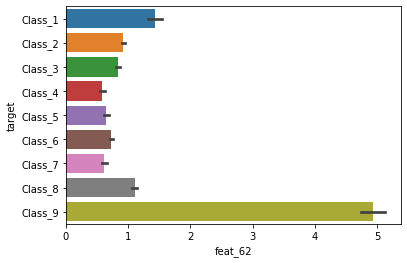

In [86]:
sns.barplot(x='feat_62', y='target', data=train)

### `feat_64` feature


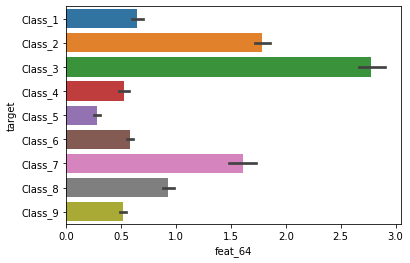

In [87]:
sns.barplot(x='feat_64', y='target', data=train)

### `feat_67` feature


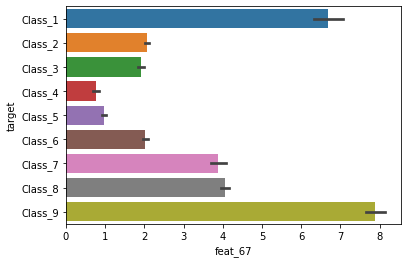

In [88]:
sns.barplot(x='feat_67', y='target', data=train)

### `feat_86` feature

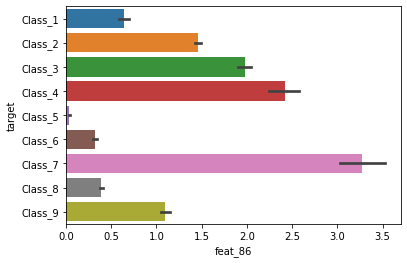

In [89]:
sns.barplot(x='feat_86', y='target', data=train)

### Analysis of Observations

The following anaylsis only discusses the features that have a mean value greater than or equal to 1.0.

* Out of the 16 features identified, 5 features appear to belong to 1 class. Taking a look at `feat_9`, `feat_11`, `feat_54`, `feat_60`, and `feat_62` have a fequency in one `target` class that's significantly greater than the others. Given the entire dataset was used to generate the charts, this analysis should hold true and is not a side-effect of having a subset of the data.
* `Class_5` is never in the top 3. This likely means the class is made up of a variety of features.
* `Class_6` is the top target value to appear within the analyzed dataset; frequency is 4. `Class_2` is the second top target, and `Class_3` is the third top target. (This analysis was done by counting the top 3 target classes for a feature and then counting the frequency of the class within its placement. For example, `Class_3` is the third top target. It appears in `feat_14`, `feat_15`, `feat_25`, `feat_32`, and `feat_86` as third highest.) So, classes 2, 3, and 6 are likely easier to predict but this might lead to overfitting because the test dataset could not include the same feature fequency distributions.

## 5) Cleaning Data

Before training a model to make predictions, standard practices indicate that cleaning up the data is important. This cleaning can range from removing or replacing values that models cannot interpet to simply splitting the data into features and labels.

### Splitting the data

Standard practices of machine learning generally favor splitting the dataset into `training` and `test`. Their names are self-evident, but for clarity, the machine learning model will use the `training` set to learn (i.e. fit), and it will use the `test` set to make predictions.

The Kaggle competition has already split the data into train and test data, and this means that both datasets need to be cleaned up at the same time. So, the following steps will be performed twice, except the drop `target` step because the test data does not include those values.

Unfortunately, I still need a way to understand the model's accurarcy after fitting. Therefore, the `training` data will also be split.

### Features

These are the columns from the dataset that machine learning models will use to predict a `target` value. Therefore, the first step to clean up the data is to remove the `target`.

In [90]:
train_features = train.drop('target', axis=1)
train_features[:3]

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


While removing the label column, the `id` column will also be dropped. Dropping the `id` makes sense because it does not provide any value when predicting. The values in that column just increase with each entry.

In [91]:
train_features = train_features.drop('id', axis=1)
train_features[:3]

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
test_features = test.drop('id', axis=1)
test_features[:3]

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1


### Labels

Labels are essentially the value a machine learning model should predict. It's effectively the answer. For this dataset, this the label column is `target`. 

In [93]:
train_labels = train['target']

train_labels[:3]

0    Class_1
1    Class_1
2    Class_1
Name: target, dtype: object

### Encoding

Machine learning models (that have been introduced in this class so far) cannot make predictions with features that are `strings`. Fortunately, the features in this dataset are all `ints`. So no encoding is necessary.

While the features do not need to be encoded, the labels need encoding for the DNN. This DataFrame will be created now but will not be used until the neural network section.

In [94]:
# Get the unique values from the labels dataset.
np.unique(train_labels)

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

In [95]:
# Create the training label set for the DNN.
# The train dataset is copied because the replace function doesn't work with a DataFrame that has 1 column.
train_labels_cat = train.copy()
# The Keras utility `to_categorical` can only transform ints, the values are replaced with their int value.
train_labels_cat = train_labels_cat.replace({'target': {'Class_1': 1, 'Class_2': 2, 'Class_3': 3, 'Class_4': 4, 'Class_5': 5, 'Class_6': 6, 'Class_7': 7, 'Class_8': 8, 'Class_9': 9}})
train_labels_cat = train_labels_cat['target']
train_labels_cat = to_categorical(train_labels_cat)
train_labels_cat[:3]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Normalizing

The values in the features columns range a decent amount, from `0` to `87` in some cases. Therefore, the feature values should be normalized. This is also a needed step because DNN's like the data to be normalized because it will help to stablize the gradient descent step.

In [96]:
normalized_train_features = (train_features - train_features.min()) / (train_features.max() - train_features.min())
normalized_train_features.describe(include="all")

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.006339,0.005158,0.014085,0.011130,0.003739,0.002570,0.005097,0.008716,0.023519,0.008797,...,0.000931,0.009678,0.017363,0.005874,0.029164,0.007504,0.006249,0.005095,0.020006,0.001450
std,0.025005,0.024550,0.045857,0.039829,0.023100,0.021533,0.027108,0.029681,0.080810,0.036111,...,0.015151,0.034553,0.041255,0.023514,0.070516,0.025039,0.035368,0.039339,0.051704,0.013813
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013158,0.000000,0.000000,...,0.000000,0.000000,0.015385,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
normalized_test_features = (test_features - test_features.min()) / (test_features.max() - test_features.min())
normalized_test_features.describe(include="all")

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,...,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000
mean,0.006034,0.005858,0.010712,0.009521,0.005107,0.002404,0.004549,0.006674,0.022027,0.004556,...,0.000568,0.009616,0.015463,0.007505,0.023663,0.007634,0.006840,0.003664,0.017652,0.001458
std,0.022951,0.028042,0.035108,0.034710,0.030612,0.020759,0.024301,0.022868,0.075503,0.020125,...,0.009762,0.034038,0.036747,0.030214,0.056494,0.026094,0.038686,0.028022,0.045770,0.014315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.013699,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting the Training Data

In [98]:
cb_train_features, cb_test_features, cb_train_labels, cb_test_labels = train_test_split(normalized_train_features, train_labels, test_size = 0.2, random_state=42)

## 6) Base Model

Before creating a Dense Neural Network model, it's good practice to create a base model to have a baseline accuracy.

The model used for a base accuracy will be a K-Nearest Neighbor Classifier. This classifier was chosen because it takes a supervised learning approach. This is desired because supervised learning works best with classification, and these features are meant to classify products.

In [99]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(cb_train_features, cb_train_labels)
knnPredictions = knn.predict(cb_test_features)

accuracy_score(cb_test_labels, knnPredictions)

0.7636554621848739

Now that we know our base model can achieve 76.4%, let's see what a neural network can achieve.

## 7) Dense Neural Network (DNN)

To create a Dense Neural Network, I will be using [Keras](https://keras.io/api/). According to the Keras [documentation](https://keras.io/about/), 

> Keras is a deep learning API written in Python, running on top of the machine learning platform [TensorFlow](https://github.com/tensorflow/tensorflow).

It's advantages are that it's simple, flexible, and powerful.

While Keras provides the ability to create a variety of neural networks, the dense neural network will be used for this project. It was chosen because the dataset is a bit simple compared to other use cases.

By simple, I mean the dataset has a dimension of 2. It's rows are the products and the features are the properties of those products. A complex dataset would be a set of images where the rows may represent the x-coordinate and the columns represent the y-coordinate of a pixel, and the value at x,y is the brightness of a pixel. A set of black and white images would therefore have a dimension of 3 because it takes 2 dimensions to store the x,y values and another dimension to store the set of pictures.

In [135]:
# Resplit the data with a categorized training label set for the DNN.
cb_train_features, cb_test_features, cb_train_labels, cb_test_labels = train_test_split(normalized_train_features, train_labels_cat, test_size = 0.2, random_state=42)

Take a look at the shapes to understand how to build the DNN.

In [101]:
cb_train_features.shape

(49502, 93)

In [102]:
cb_train_labels.shape

(49502, 10)

In [103]:
cb_test_features.shape

(12376, 93)

In [104]:
cb_test_labels.shape

(12376, 10)

Define the parameters for the network.

In [105]:
input_size = 93 # The input size is the number of features, 93.
hidden_size = [512, 256, 128, 64] # These 4 values are all powers of 2 to ensure the number of possible activations decreases with each hidden layer.
output_size = 10 # There are 9 classes and the extra output maps to none of the classes, which is a side effect of the `to_categorical` step.

### Instantiating Networks

Build the networks.

A variety of networks will be instantiated, compiled, and fitted in the hopes of understanding how many hidden layers are needed.

In [136]:
network = models.Sequential()
network.add(layers.Dense(hidden_size[0], activation='relu', input_shape=(input_size,)))
network.add(layers.Dense(output_size, activation='softmax'))

network.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 512)               48128     
                                                                 
 dense_29 (Dense)            (None, 10)                5130      
                                                                 
Total params: 53,258
Trainable params: 53,258
Non-trainable params: 0
_________________________________________________________________


In [137]:
network2 = models.Sequential()
network2.add(layers.Dense(hidden_size[0], activation='relu', input_shape=(input_size,)))
network2.add(layers.Dense(hidden_size[1], activation='relu'))
network2.add(layers.Dense(output_size, activation='softmax'))

network2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               48128     
                                                                 
 dense_31 (Dense)            (None, 256)               131328    
                                                                 
 dense_32 (Dense)            (None, 10)                2570      
                                                                 
Total params: 182,026
Trainable params: 182,026
Non-trainable params: 0
_________________________________________________________________


In [138]:
network3 = models.Sequential()
network3.add(layers.Dense(hidden_size[0], activation='relu', input_shape=(input_size,)))
network3.add(layers.Dense(hidden_size[1], activation='relu'))
network3.add(layers.Dense(hidden_size[2], activation='relu'))
network3.add(layers.Dense(output_size, activation='softmax'))

network3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 512)               48128     
                                                                 
 dense_34 (Dense)            (None, 256)               131328    
                                                                 
 dense_35 (Dense)            (None, 128)               32896     
                                                                 
 dense_36 (Dense)            (None, 10)                1290      
                                                                 
Total params: 213,642
Trainable params: 213,642
Non-trainable params: 0
_________________________________________________________________


In [139]:
network4 = models.Sequential()
network4.add(layers.Dense(hidden_size[0], activation='relu', input_shape=(input_size,)))
network4.add(layers.Dense(hidden_size[1], activation='relu'))
network4.add(layers.Dense(hidden_size[2], activation='relu'))
network4.add(layers.Dense(hidden_size[3], activation='relu'))
network4.add(layers.Dense(output_size, activation='softmax'))

network4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 512)               48128     
                                                                 
 dense_38 (Dense)            (None, 256)               131328    
                                                                 
 dense_39 (Dense)            (None, 128)               32896     
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 dense_41 (Dense)            (None, 10)                650       
                                                                 
Total params: 221,258
Trainable params: 221,258
Non-trainable params: 0
_________________________________________________________________


### Compile Networks

Compile the networks.

In [140]:
optimizer = optimizers.RMSprop(learning_rate=1e-4)

network.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network2.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network3.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network4.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Fitting

Fit the networks to the dataset.

The training dataset is 49502, which factors into `2 * 53 * 467`. So, any combination of the those factors can be used to ensure the fit uses the entire training dataset.

To ensure the fitting not take a long time, there will be 53 epochs and each bach will be 934 (2 * 467 = 934).

In [141]:
EPOCHS = 53
BATCH_SIZE = 934

In [142]:
network.fit(cb_train_features, cb_train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/53
53/53 [==============================] - 1s 3ms/step - loss: 2.2458 - accuracy: 0.4719
Epoch 2/53
53/53 [==============================] - 0s 6ms/step - loss: 2.1542 - accuracy: 0.5179
Epoch 3/53
53/53 [==============================] - 0s 6ms/step - loss: 2.0532 - accuracy: 0.5255
Epoch 4/53
53/53 [==============================] - 0s 3ms/step - loss: 1.9441 - accuracy: 0.5317
Epoch 5/53
53/53 [==============================] - 0s 3ms/step - loss: 1.8339 - accuracy: 0.5372
Epoch 6/53
53/53 [==============================] - 0s 3ms/step - loss: 1.7297 - accuracy: 0.5433
Epoch 7/53
53/53 [==============================] - 0s 3ms/step - loss: 1.6350 - accuracy: 0.5514
Epoch 8/53
53/53 [==============================] - 0s 3ms/step - loss: 1.5510 - accuracy: 0.5629
Epoch 9/53
53/53 [==============================] - 0s 3ms/step - loss: 1.4753 - accuracy: 0.5784
Epoch 10/53
53/53 [==============================] - 0s 3ms/step - loss: 1.4066 - accuracy: 0.5925
Epoch 11/53
53/53 [

In [143]:
network2.fit(cb_train_features, cb_train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/53
53/53 [==============================] - 1s 3ms/step - loss: 2.2004 - accuracy: 0.4408
Epoch 2/53
53/53 [==============================] - 0s 4ms/step - loss: 1.9490 - accuracy: 0.5362
Epoch 3/53
53/53 [==============================] - 0s 3ms/step - loss: 1.6691 - accuracy: 0.5599
Epoch 4/53
53/53 [==============================] - 0s 3ms/step - loss: 1.4375 - accuracy: 0.5829
Epoch 5/53
53/53 [==============================] - 0s 3ms/step - loss: 1.2593 - accuracy: 0.6175
Epoch 6/53
53/53 [==============================] - 0s 4ms/step - loss: 1.1254 - accuracy: 0.6481
Epoch 7/53
53/53 [==============================] - 0s 3ms/step - loss: 1.0259 - accuracy: 0.6737
Epoch 8/53
53/53 [==============================] - 0s 3ms/step - loss: 0.9505 - accuracy: 0.6953
Epoch 9/53
53/53 [==============================] - 0s 3ms/step - loss: 0.8931 - accuracy: 0.7069
Epoch 10/53
53/53 [==============================] - 0s 3ms/step - loss: 0.8484 - accuracy: 0.7141
Epoch 11/53
53/53 [

In [144]:
network3.fit(cb_train_features, cb_train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/53
53/53 [==============================] - 1s 4ms/step - loss: 2.1892 - accuracy: 0.4967
Epoch 2/53
53/53 [==============================] - 0s 3ms/step - loss: 1.8230 - accuracy: 0.5421
Epoch 3/53
53/53 [==============================] - 0s 4ms/step - loss: 1.4475 - accuracy: 0.5779
Epoch 4/53
53/53 [==============================] - 0s 4ms/step - loss: 1.2123 - accuracy: 0.6234
Epoch 5/53
53/53 [==============================] - 0s 4ms/step - loss: 1.0574 - accuracy: 0.6627
Epoch 6/53
53/53 [==============================] - 0s 4ms/step - loss: 0.9465 - accuracy: 0.6951
Epoch 7/53
53/53 [==============================] - 0s 5ms/step - loss: 0.8674 - accuracy: 0.7109
Epoch 8/53
53/53 [==============================] - 0s 5ms/step - loss: 0.8125 - accuracy: 0.7180
Epoch 9/53
53/53 [==============================] - 0s 5ms/step - loss: 0.7742 - accuracy: 0.7234
Epoch 10/53
53/53 [==============================] - 0s 5ms/step - loss: 0.7466 - accuracy: 0.7278
Epoch 11/53
53/53 [

In [145]:
network4.fit(cb_train_features, cb_train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/53
53/53 [==============================] - 1s 4ms/step - loss: 2.2068 - accuracy: 0.4452
Epoch 2/53
53/53 [==============================] - 0s 4ms/step - loss: 1.8714 - accuracy: 0.5287
Epoch 3/53
53/53 [==============================] - 0s 4ms/step - loss: 1.4875 - accuracy: 0.5761
Epoch 4/53
53/53 [==============================] - 0s 4ms/step - loss: 1.2302 - accuracy: 0.6019
Epoch 5/53
53/53 [==============================] - 0s 4ms/step - loss: 1.0699 - accuracy: 0.6399
Epoch 6/53
53/53 [==============================] - 0s 4ms/step - loss: 0.9654 - accuracy: 0.6755
Epoch 7/53
53/53 [==============================] - 0s 4ms/step - loss: 0.8928 - accuracy: 0.6984
Epoch 8/53
53/53 [==============================] - 0s 4ms/step - loss: 0.8402 - accuracy: 0.7119
Epoch 9/53
53/53 [==============================] - 0s 4ms/step - loss: 0.8001 - accuracy: 0.7174
Epoch 10/53
53/53 [==============================] - 0s 4ms/step - loss: 0.7694 - accuracy: 0.7226
Epoch 11/53
53/53 [

### Accuracy of Networks

#### 1 Hidden Layer

In [146]:
test_loss, test_acc = network.evaluate(cb_test_features, cb_test_labels)

387/387 [==============================] - 1s 2ms/step - loss: 0.6846 - accuracy: 0.7464


In [147]:
print('test_acc:', test_acc)

test_acc: 0.7463639378547668


#### 2 Hidden Layers

In [148]:
test_loss, test_acc = network2.evaluate(cb_test_features, cb_test_labels)

387/387 [==============================] - 1s 2ms/step - loss: 0.5882 - accuracy: 0.7731


In [149]:
print('test_acc:', test_acc)

test_acc: 0.7731092572212219


#### 3 Hidden Layers

In [150]:
test_loss, test_acc = network3.evaluate(cb_test_features, cb_test_labels)

387/387 [==============================] - 1s 2ms/step - loss: 0.5685 - accuracy: 0.7772


In [151]:
print('test_acc:', test_acc)

test_acc: 0.7772301435470581


#### 4 Hidden Layers

In [152]:
test_loss, test_acc = network4.evaluate(cb_test_features, cb_test_labels)

387/387 [==============================] - 1s 3ms/step - loss: 0.5697 - accuracy: 0.7774


In [153]:
print('test_acc:', test_acc)

test_acc: 0.7773917317390442


## 8) Conclusion

The accuracy for the training dataset is 0.7773917317390442 with 4 hidden nodes. That was the best performance out of the tested models.

### Summary of Scores

| Classifier      | Score |
| ----------- | ----------- |
| KNN      | 0.7636554621848739       |
| DNN (1 Hidden)   | 0.7463639378547668        |
| DNN (2 Hidden)   | 0.7731092572212219        |
| DNN (3 Hidden)   | 0.7772301435470581        |
| DNN (4 Hidden)   | 0.7773917317390442        |

### Best Hyperparameters

Given the data above,

* It seems that having at least 2 hidden layers will generate an accuracy greater than the base model (kNN, where k=3).
* The 4th hidden layer did not improve the accuracy too much. It might be worth testing different unit values for the hidden layers to see if the last layer being 64 makes a difference. It could be that larger inputs larger than the initial input size of 93 perform better.

## 9) Kaggle Submission

The Kaggle competition included a sample submission file. The file was included as a way to submit the predictions made by a model.

Because DNN with 4 hidden layers performed the best, it will be used to make predictions based on the `test.csv` dataset.

In [124]:
best_dnn_predictions = network4.predict(test_features)

4512/4512 [==============================] - 8s 2ms/step


In [125]:
best_dnn_predictions

array([[0.0000000e+00, 0.0000000e+00, 2.7194434e-07, ..., 5.2710626e-21,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.5039428e-12, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 9.9996829e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.7328684e-04, ..., 2.5859535e-08,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [126]:
predictions_df = pd.DataFrame(best_dnn_predictions, columns=['Class_0', 'Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6', 'Class_7', 'Class_8', 'Class_9'])
predictions_df[:3]

,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,0.0,0.0,2.719443e-07,1.0,1.583411e-10,0.0,0.0,5.271063e-21,0.0,0.0
1,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,1.0,0.0
2,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,1.0,0.000000e+00,0.0,0.0


In [127]:
submit = pd.read_csv("sampleSubmission.csv")
submit['Class_1'] = predictions_df['Class_1']
submit['Class_2'] = predictions_df['Class_2']
submit['Class_3'] = predictions_df['Class_3']
submit['Class_4'] = predictions_df['Class_4']
submit['Class_5'] = predictions_df['Class_5']
submit['Class_6'] = predictions_df['Class_6']
submit['Class_7'] = predictions_df['Class_7']
submit['Class_8'] = predictions_df['Class_8']
submit['Class_9'] = predictions_df['Class_9']

submit[:3]

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0.0,2.719443e-07,1.0,1.583411e-10,0.0,0.0,5.271063e-21,0.0,0.0
1,2,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,1.0,0.0
2,3,0.0,0.000000e+00,0.0,0.000000e+00,0.0,1.0,0.000000e+00,0.0,0.0


In [128]:
submit.describe(include="all")

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
count,144368.000000,1.443680e+05,144368.000000,144368.000000,1.443680e+05,144368.000000,1.443680e+05,1.443680e+05,1.443680e+05,1.443680e+05
mean,72184.500000,2.596695e-02,0.163787,0.225609,3.568775e-02,0.045991,2.117872e-01,4.888743e-02,1.583964e-01,8.388665e-02
std,41675.596169,1.552501e-01,0.357088,0.406061,1.798698e-01,0.209129,4.071002e-01,2.125264e-01,3.635458e-01,2.753166e-01
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,36092.750000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,72184.500000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,108276.250000,1.595179e-31,0.000220,0.075000,4.419869e-25,0.000000,3.476558e-10,3.168098e-25,9.687051e-23,2.411547e-32
max,144368.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [129]:
submit.to_csv('submit.csv', index=False)